Movie recommendation system using cosine similarity 

In [128]:

#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitlearn libraries too


In [129]:
#reading the data
movies = pd.read_csv("movies.csv")
rate = pd.read_csv("ratings.csv")

In [130]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [131]:
rate.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### drop duplicates

In [132]:
movies.drop_duplicates()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [133]:
rate.drop_duplicates()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [134]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [135]:
rate.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [136]:
movies.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [137]:
rate.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


####EDA(exploritarty data analaysis)

In [138]:
rate["rating"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [139]:
## sobasically the movie rating least is 1/2 star and highest is 5 star and mean is 3.5

In [140]:
sd=np.std(rate["rating"])
print(sd)

1.0425240696180562


In [141]:
## sd 1 indicates the data is spread far that is it has high variability

In [142]:
hrm4= rate.query("rating >= 4")
print(hrm4)
###movies which have rating above and equal to 4

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100830     610   166528     4.0  1493879365
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352

[48580 rows x 4 columns]


In [143]:
hrm5= rate.query("rating == 5")
print(hrm5)
###movies which have rating  equal to 5

        userId  movieId  rating   timestamp
3            1       47     5.0   964983815
4            1       50     5.0   964982931
6            1      101     5.0   964980868
8            1      151     5.0   964984041
9            1      157     5.0   964984100
...        ...      ...     ...         ...
100814     610   158238     5.0  1479545219
100829     610   164179     5.0  1493845631
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352

[13211 rows x 4 columns]


In [144]:
a=pd.DataFrame(movies["genres"])
a1=a.drop_duplicates


In [145]:
### ratings by a single user == rpu

rpu = rate.groupby("userId").size()
print((rpu))

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Length: 610, dtype: int64


In [146]:
rpu.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64

<Axes: >

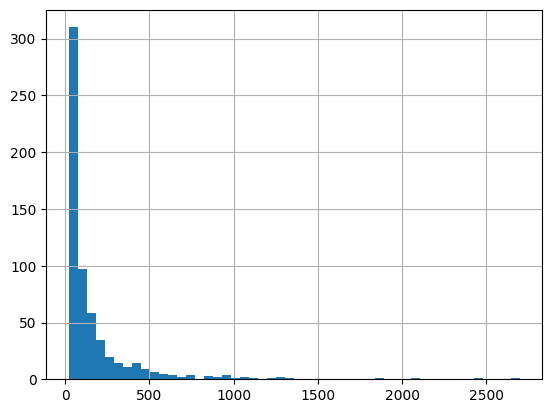

In [147]:
#histograph of ratings per user 
rpu.hist(bins=50)

In [148]:
movies['genres'] = movies['genres'].str.split('|')
## the split here makes the genre data into list as a movie has mulitple genres so we had to breakk it up

In [149]:
movie_genre_counts = movies["genres"].explode().value_counts()
### the explode here makes the list into  dataframe or series and then using value counts we counts the genre

In [150]:
print(movie_genre_counts)

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [151]:
user_item_matrix = rate.pivot_table(index='userId', columns='movieId', values='rating')

In [152]:
print(f"Matrix shape: {user_item_matrix.shape}")

Matrix shape: (610, 9724)


In [153]:
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


using cosine similarity for recommendation system 

In [154]:
from sklearn.metrics.pairwise import cosine_similarity
# cosine similarity uses the cosine of the angle between two vectors to determine how similar they are

In [155]:
user_item_matrix_filled = user_item_matrix.fillna(0)

In [156]:
cosine_sim=cosine_similarity(user_item_matrix_filled.T)
### after transposing the columns represents the movies and rows represents the userid

In [157]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=user_item_matrix.columns,columns=user_item_matrix.columns)

In [158]:
sample_movie_id = user_item_matrix.columns[0] 
print(cosine_sim_df[sample_movie_id].sort_values(ascending=False).head(10))

movieId
1       1.000000
3114    0.572601
480     0.565637
780     0.564262
260     0.557388
356     0.547096
364     0.541145
1210    0.541089
648     0.538913
1265    0.534169
Name: 1, dtype: float64


In [159]:
### we select an user and his highly rated movie and then we find similarity using cosine_similarity matrix and recommend the movies based on the values 

In [160]:
user_id = user_item_matrix.index[1]
print(user_id)

2


In [161]:
user_rated_movies = user_item_matrix.loc[user_id].dropna()

In [162]:
movie_id = user_rated_movies.index[1] 
print(movie_id)

333


In [163]:
similar_movies = cosine_sim_df[movie_id].sort_values(ascending=False)  
print(similar_movies.head(10))

movieId
333     1.000000
216     0.574895
231     0.522402
104     0.470133
413     0.458900
276     0.436775
432     0.421968
19      0.418585
1753    0.413624
585     0.403156
Name: 333, dtype: float64


In [164]:
# Exclude movies the user has already rated
unrated_movies = similar_movies.drop(user_rated_movies.index, errors='ignore')

# Rank the movies based on similarity
top_n_recommendations = unrated_movies.head(10)  # Get top 10 similar movies
recommended_movies = top_n_recommendations.reset_index()  # Convert index to column for merging
recommended_movies = recommended_movies.merge(movies, how='left', on='movieId')

print("Top 10 Recommendations for User", user_id)
print(recommended_movies[['movieId', 'title']])


Top 10 Recommendations for User 2
   movieId                                              title
0      216                               Billy Madison (1995)
1      231             Dumb & Dumber (Dumb and Dumber) (1994)
2      104                               Happy Gilmore (1996)
3      413                                    Airheads (1994)
4      276                                  Milk Money (1994)
5      432  City Slickers II: The Legend of Curly's Gold (...
6       19              Ace Ventura: When Nature Calls (1995)
7     1753                                  Half Baked (1998)
8      585                      Brady Bunch Movie, The (1995)
9      344                  Ace Ventura: Pet Detective (1994)
